<a href="https://colab.research.google.com/github/darren-source/Marketing_Text2/blob/main/Copy_of_Untitled190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Library used for opening and reading gzipped files
import gzip
# Library used for parsing JSON formatted strings into Python dictionaries
import json
# Initializes an empty set which will store unique ASINs
nike_asins = set()
# Opens the gzipped file
with gzip.open("/content/drive/MyDrive/_meta_Clothing_Shoes_and_Jewelry.jsonl.gz") as f:
    for line in f:
        data = json.loads(line)
        # Extracts and flattens the categories associated with each product
        categories = [item.lower() for category_list in data.get("categories", []) for item in category_list]
        if 'nike' in categories:
            nike_asins.add(data['asin'])
# Prints the total number of unique Nike products
print(f"Found {len(nike_asins)} Nike products.")

Found 8327 Nike products.


In [ ]:
# Initializes an empty list
nike_reviews = []
# Opens the gzipped file
with gzip.open("/content/drive/MyDrive/reviews_Clothing_Shoes_and_Jewelry.json.gz") as f:
    for line in f:
        review = json.loads(line)
        # Converts each line from a JSON formatted string into a Python dictionary
        if review['asin'] in nike_asins:
            nike_reviews.append(review)
# Total number of reviews for Nike products
print(f"Collected {len(nike_reviews)} reviews for Nike products.")

Collected 21570 reviews for Nike products.


In [ ]:
# Library used for topic modeling
from sklearn.decomposition import LatentDirichletAllocation
# Converts a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# Extracts the reviewText from each review
review_texts = [review['reviewText'] for review in nike_reviews]
# Initializes a CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Converts the list of review texts into a document-term matrix
X = vectorizer.fit_transform(review_texts)
# Creates an instance of LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=30, random_state=42)
# Fits the LDA model to the document-term matrix and transforms it
topics = lda.fit_transform(X)
# Retrieves the list of feature words that have been used in the vectorization
feature_names = vectorizer.get_feature_names_out()
# Sorts the indices of feature_names based on their contribution to the topic and slices the last 10 elements
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}: " + " ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0: socks sandals nike don got time slide star rating high
Topic 1: shoes amazon shoe happy thanks nike purchase pair box thank
Topic 2: sneakers sneaker love comfortable pair years wear shoe nike ve
Topic 3: little big shoes nike small toe bit think narrow dont
Topic 4: great fit shoes expected product time exactly perfect arrived came
Topic 5: muy el la que en para los es lo producto
Topic 6: cleats pair like nike comfortable pairs shoes cleat bought soccer
Topic 7: shirt great shorts just fit fits sunglasses pants bra large
Topic 8: amazon return shoe did shoes pay received just black pair
Topic 9: picture strap does photo just color love look like person
Topic 10: shoes love color comfortable great look like colors fit pair
Topic 11: like don shoes laces pretty shoe squeak nike good problem
Topic 12: daughter wears bought loves boyfriend track day child runs morning
Topic 13: watch time band easy wrist like use face battery watches
Topic 14: shoe tight wear size like little ju

In [ ]:
#!pip uninstall pyLDAvis -y
#!pip install pyLDAvis




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.9/398.9 kB 20.8 MB/s eta 0:00:00


In [ ]:
# Library used for visualizing the information and results of topic models
import pyLDAvis
import pyLDAvis.lda_model
# Configures pyLDAvis to work within a Jupyter Notebook environment
pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(lda, X, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster      Freq
topic                                                 
29     69.793404  13.824312       1        1  8.143593
10    -18.040483  25.666416       2        1  7.495494
20     -3.336889  43.859425       3        1  6.165372
19     43.419434  16.377775       4        1  6.036375
17     15.098750  27.791864       5        1  5.759882
15      7.975566 -88.973587       6        1  5.755457
8      27.292330 -20.445370       7        1  5.143694
13      0.845382 -37.680229       8        1  4.439702
25     23.755753   2.742138       9        1  4.313320
1     -21.767292  63.321003      10        1  3.773079
22    -36.259869 -44.636456      11        1  3.762581
4      12.697716  63.374680      12        1  3.750570
2      12.581013 -63.647766      13        1  2.787505
18    -67.014191   9.653239      14        1  2.728857
11      0.378769  10.009409      15        1  2.717587
14     35.391159  39.650806      16        1  2.667527
21    -41.298634  18.274569      17        1  2.302287
3     -19.915352 -24.618986      18        1  2.278156
24     52.848442 -10.531272      19        1  2.176755
7     -61.245304 -31.076984      20        1  2.086909
6     -20.890869  -0.296890      21        1  1.967022
28    -44.115108 -10.049478      22        1  1.951437
0      26.696598  89.462624      23        1  1.950136
23      2.998287 -13.378038      24        1  1.900562
27     52.306503 -38.267994      25        1  1.493199
12     50.091564  59.863956      26        1  1.422085
16     40.065205 -95.153336      27        1  1.387573
26    -14.896329 -60.881073      28        1  1.270541
9     -44.066010  44.679390      29        1  1.244945
5      26.494955 -44.625134      30        1  1.127798, topic_info=           Term         Freq        Total Category  logprob  loglift
7495       size  4872.000000  4872.000000  Default  30.0000  30.0000
9187      watch  2364.000000  2364.000000  Default  29.0000  29.0000
7376       shoe  6798.000000  6798.000000  Default  28.0000  28.0000
168          34  1171.000000  1171.000000  Default  27.0000  27.0000
7716        son  1675.000000  1675.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
518          al    46.350499    48.309210  Topic30  -4.6336   4.4435
9031  venezuela    33.794078    35.945046  Topic30  -4.9496   4.4232
8516     tiempo    36.001171    39.036375  Topic30  -4.8863   4.4040
7716        son    66.946953  1675.233466  Topic30  -4.2660   1.2651
11          100    43.682708   310.727929  Topic30  -4.6929   2.5229

[2185 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         7  0.821939     00
0        10  0.053028     00
0        21  0.088381     00
0        23  0.008838     00
0        26  0.026514     00
...     ...       ...    ...
9488     25  0.023416   zoom
9488     28  0.433199   zoom
9489      6  0.828682  zooms
9491      1  0.366275  zumba
9491     13  0.629241  zumba

[9163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[30, 11, 21, 20, 18, 16, 9, 14, 26, 2, 23, 5, 3, 19, 12, 15, 22, 4, 25, 8, 7, 29, 1, 24, 28, 13, 17, 27, 10, 6])

In [ ]:
# Imports the NumPy library
import numpy as np
#
def get_topic_descriptions(lda, vectorizer, top_n=10):
    # An array where each row represents a topic and each column a word
    topic_terms = lda.components_
    # list of all words used in the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    # Initializes an empty list
    topic_descriptions = []

    for topic_weights in topic_terms:
        # Each topic's weights sorted in descending order
        top_feature_indices = topic_weights.argsort()[::-1][:top_n]
        # list of the top words
        term_list = [feature_names[i] for i in top_feature_indices]
        topic_descriptions.append(" ".join(term_list))
    return topic_descriptions
# Topic_descriptions function with the LDA model and vectorizer to generate descriptions for each topic.
topic_descriptions = get_topic_descriptions(lda, vectorizer)
# Topic description index
for index, desc in enumerate(topic_descriptions):
    print(f"Topic {index}: {desc}")
# The 'topics' variable contains the topic distributions, which is what we need
review_topic_distributions = topics
# Assign each review to its most probable topic
review_topics = np.argmax(review_topic_distributions, axis=1)
# Loops through first 10 reviews
for i in range(min(10, len(nike_reviews))):
    topic_index = review_topics[i]
    print(f"ASIN: {nike_reviews[i]['asin']}, Review Topic: {topic_index} - {topic_descriptions[topic_index]}")

Topic 0: socks sandals nike don got time slide star rating high
Topic 1: shoes amazon shoe happy thanks nike purchase pair box thank
Topic 2: sneakers sneaker love comfortable pair years wear shoe nike ve
Topic 3: little big shoes nike small toe bit think narrow dont
Topic 4: great fit shoes expected product time exactly perfect arrived came
Topic 5: muy el la que en para los es lo producto
Topic 6: cleats pair like nike comfortable pairs shoes cleat bought soccer
Topic 7: shirt great shorts just fit fits sunglasses pants bra large
Topic 8: amazon return shoe did shoes pay received just black pair
Topic 9: picture strap does photo just color love look like person
Topic 10: shoes love color comfortable great look like colors fit pair
Topic 11: like don shoes laces pretty shoe squeak nike good problem
Topic 12: daughter wears bought loves boyfriend track day child runs morning
Topic 13: watch time band easy wrist like use face battery watches
Topic 14: shoe tight wear size like little ju

# Marketing & Product Insight

**Attributes that People Like About the Nike Products**

Topic 2 & Topic 6: Both topics highlight that customers love the comfort and
fit of the shoes.
Marketing Action: Create Advertisement campaigns that highlight the comfort and stylish design of these shoes
Product Developement: Continue to innovate with materials that extra comfort to the shoes and sandles.  Make comfort a priority when designing Nike products.

Topic 4: Emphasizes the lightness and comfort of wearing Nike's footwear and apparel
Marketing Action:  
Product Developement: Continue to innovate with lightweight materials that enhance comfort without sacrificing durability.

**Attributes that People Did Not Like About the Nike Products**

Topic 3 & Topic 14: These topics indicate issues with sizing and comfort, particularly that some shoes may run small or don't fit as expected.
Customer Service Action: Provide clearer sizing guideline, including measurements and international size conversions. Consider a virtual fitting app to help customers choose the right size.
Product Development: Review the design and fit of the models frequently to determine if the sizing of the design is accurate.

**Pricing**
No specific topics or mentioning of poor pricing were highlighted directly from these outputs, suggesting that the current product pricing strategy may be well-received, and/or that pricing is not much of a concern among the reviewers.
Strategic Insight: Maintain the current pricing strategy but continue monitoring reviews and social media for any emerging discussions about pricing.

**Whats not in the Data**
The absence of significant discussion around high-end brands could suggest these elements are either not valued or are not well-promoted.
Marketing Recommendation: Boost visibility and awareness of high-end products through targeted campaigns that highlight the exclusivity and unique design of the products.


# Super Reviewers Sentiment Polarity

In [ ]:
# Imports the pandas library for Data manipulation
import pandas as pd
# Read the JSON file into a pandas DataFrame
df_reviews = pd.read_json('/content/drive/MyDrive/reviews_Clothing_Shoes_and_Jewelry.json.gz', lines=True)
# Count the occurence of each unique reviewer
review_counts = df_reviews['reviewerID'].value_counts()
# Computes the 99th percentile value of the review counts
top_1_percentile = review_counts.quantile(0.99)
# Filters review_counts to include only those reviewers whose count is greater than 99%
super_reviewers = review_counts[review_counts >= top_1_percentile].index.tolist()
# Use a mask to filter out only reviews done by Super Reviewers
df_super_reviews = df_reviews[df_reviews['reviewerID'].isin(super_reviewers)]
# Print DataFrame stats.
print(df_super_reviews.describe())




             overall  unixReviewTime
count  596299.000000    5.962990e+05
mean        4.237607    1.365498e+09
std         1.122342    4.071611e+07
min         1.000000    9.747648e+08
25%         4.000000    1.355962e+09
50%         5.000000    1.377130e+09
75%         5.000000    1.392163e+09
max         5.000000    1.406074e+09


In [ ]:
# Print the first two lines of the Super Reviewer Dataset
df_super_reviews.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
8,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
44,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"


In [ ]:
# Print the first five entries from my list of super_reviewers
print(super_reviewers[:5])



['A3W4D8XOGLWUN5', 'A5QQRB2QOY96U', 'A2KBV88FL48CFS', 'A1Z4LX3Q1YMF84', 'A1RRMZKOMZ2M7J']


In [ ]:
import random
# Randomly select an item from the list super_reviewers
selected_reviewer = random.choice(super_reviewers)
# Prints out the selected reviewer ID
print(f"Selected Reviewer ID: {selected_reviewer}")

Selected Reviewer ID: AHUJ9RP3ABQKN


In [ ]:
# Filters the DataFrame df_super_reviews to include only the rows where the reviewerID matches the selected_reviewer
selected_reviews = df_super_reviews[df_super_reviews['reviewerID'] == selected_reviewer]
print(selected_reviews[['reviewText', 'overall', 'reviewTime']])

                                                reviewText  overall  \
1115573  This is not the top of the line jewelry cleane...        4   
2149540  My son loves these boots. Very comfy and true ...        5   
3091650  Great price and great boots. Wish I would of g...        5   
3918141  Love the length its perfect. I am somewhat sma...        5   
4059456  I ordered them a little a large because I like...        5   
4465797  They fit perfectly!  Gorgeous sandals to wear ...        5   
4997557  True to size and looks just like the pic. Very...        5   
5170773  This is so cute on. I'm 5 8 and 122 lbs I orde...        5   
5204538  Love this so cute I ordered a large and I'm 5'...        5   
5292482  This is s beautiful purse with roomy space ins...        5   
5510604  These pants are so cute and no one I know or h...        5   
5581334  Such a cute little accent to my poppy coach pu...        5   

          reviewTime  
1115573  01 30, 2014  
2149540   02 6, 2014  
3091650

In [ ]:
#  Iterates over the DataFrame rows
for index, review in selected_reviews.iterrows():
    print(f"Review {index + 1}:")
    print(f"Rating: {review['overall']}")
    print(f"Date: {review['reviewTime']}")
    print(f"Text: {review['reviewText']}\n")

Review 1115574:
Rating: 4
Date: 01 30, 2014
Text: This is not the top of the line jewelry cleaner. But it does clean very good. You must by the blitz concentraded jewelry cleaner which is Amazon also.

Review 2149541:
Rating: 5
Date: 02 6, 2014
Text: My son loves these boots. Very comfy and true to your shoe size. He looks great in them! ! Very nice quality and stunning boots!

Review 3091651:
Rating: 5
Date: 02 6, 2014
Text: Great price and great boots. Wish I would of got 1 size smaller but they are comfy and cute. They Might run a little large in size;:)

Review 3918142:
Rating: 5
Date: 02 6, 2014
Text: Love the length its perfect. I am somewhat small but tall I ordered the large and its not too tight or to lose. They are soft and comfy great to wear with leggings and Boots or in the summer with flip flops!

Review 4059457:
Rating: 5
Date: 02 18, 2014
Text: I ordered them a little a large because I like them loose and they are. I ordered a large and they are very comfy and cute!

Re

In [ ]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Import Textblob library used for text sentiment analysis and part-of-speech tagging
from textblob import TextBlob
# Uses a lambda function to review text, converts it into a TextBlob object, and then accesses the sentiment polarity
df_super_reviews['sentiment'] = df_super_reviews['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Computes the mean of the values in the sentiment column.
average_sentiment = df_super_reviews['sentiment'].mean()
# Print out the average sentiment polarity
print(f"Average Sentiment Polarity: {average_sentiment}")

Average Sentiment Polarity: 0.2691395077798723


<ipython-input-25-9b19d023f863>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_super_reviews['sentiment'] = df_super_reviews['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

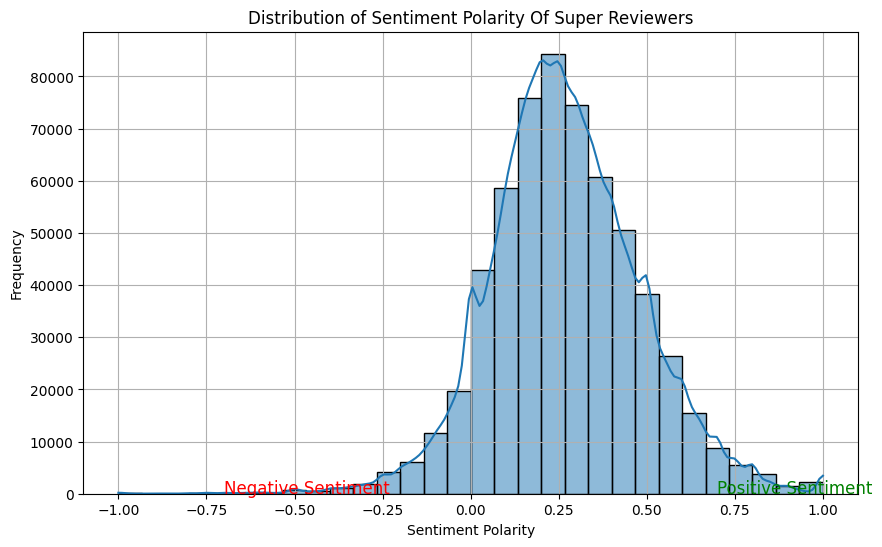

In [ ]:
# Figure plot size
plt.figure(figsize=(10, 6))
# Create histogram using seaborn
sns.histplot(df_super_reviews['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity Of Super Reviewers')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
# Enable Grid
plt.grid(True)
ax = plt.gca()
# Create annotation labels on the plot
ax.annotate('Positive Sentiment', xy=(1.0, 10), xytext=(0.7, 50),
            fontsize=12, color='green')

ax.annotate('Negative Sentiment', xy=(-1.0, 10), xytext=(-0.7, 50),
            fontsize=12, color='red')

# Render the plot
plt.show()

# Applying sentiment polarity analysis of super reviewers to Nike’s market evaluation
**Targeted Marketing Campaigns**
Highlight Positively Reviewed Features: Marketing efforts can be tailored to emphasize the features that generate positive feedback and the highest positive sentiment.

Reputation Management: Negative sentiments, such as complaints about product durability or fit from Super Reviewers, should be managed proactively.

**Customer Segmentation and Personalization**
Personalized Marketing: Using sentiment data, Nike can personalize marketing messages sent through emails to targeted individuals based on their sentiment history trends associated with their previous purchasing history.


